In [1]:
import pandas as pd
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split , cross_val_score
import joblib

In [2]:
with open('D:\DS\crwa\Data-Science-project\preprocess_data.json', 'r') as file:
    json_data = file.read()

df = pd.read_json(StringIO(json_data))

In [3]:
col = ['url','name','asin']
df.drop(columns=col, inplace=True)

In [4]:
categorical_columns = ['brand', 'color', 'department','origin']

In [5]:
target = 'price'
features = [col for col in df.columns if col != target]
x = df[features]
y = df[target]

In [6]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV , KFold

param_grid = {
    'max_depth': [5, 10, 15, 20, 25,30],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 5],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)


dt_reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=cv, scoring=['r2','neg_mean_squared_error'], refit='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_l

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15]},
             refit='neg_mean_squared_error',
             scoring=['r2', 'neg_mean_squared_error'], verbose=2)

In [9]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'RMAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

Best Parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 15}
RMAE: 0.8705944055944066
RMSE: 9.806825184706724
R²: 0.5908203605982181


In [10]:
joblib.dump(best_model, "decision_tree_price_prediction_model.pkl")

['decision_tree_price_prediction_model.pkl']

In [11]:
import numpy as np

results = grid_search.cv_results_

max_depths = [params['max_depth'] for params in results['params']]

mean_r2_scores = results['mean_test_r2']
mean_neg_mse_scores = results['mean_test_neg_mean_squared_error']

In [12]:
mean_mse_scores = -1 * np.array(mean_neg_mse_scores) 
mean_rmse_scores = np.sqrt(mean_mse_scores)

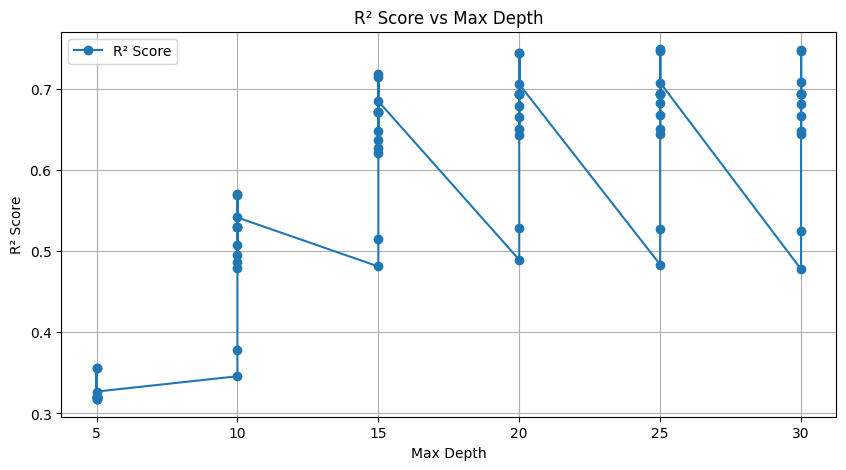

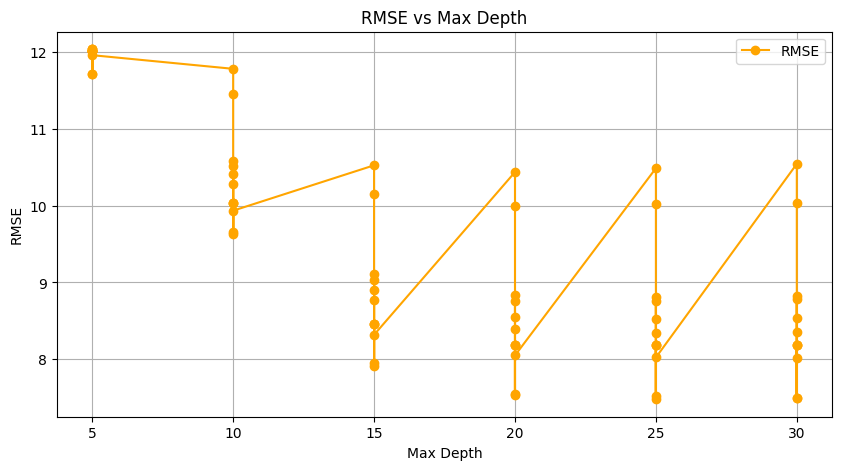

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(max_depths, mean_r2_scores, 'o-', label="R² Score")
plt.title('R² Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(max_depths, mean_rmse_scores, 'o-', color='orange', label="RMSE")
plt.title('RMSE vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()